In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
ls

 appendix-B-linear-algebra.ipynb
 cardata.csv
 chapter-10-logistic.ipynb
 chapter-11-roc.ipynb
 chapter-12-Neural-Network.ipynb
 chapter-13-Naive-Bayes.ipynb
 chapter-14-KNN.ipynb
 chapter-15-LDA-QDA.ipynb
 chapter-16-PCA.ipynb
 chapter-17-SVM.ipynb
 chapter-18-decision-tree.ipynb
 chapter-19-ensembles.ipynb
 chapter-1-least-squares-edited.ipynb
 chapter-1-least-squares.ipynb
 chapter-20-heart-disease.ipynb
 chapter-21-clustering.ipynb
 chapter-2-multilinear-edited.ipynb
 chapter-2-multilinear.ipynb
 chapter-3-polynomial.ipynb
 chapter-4-stepwise-regression.ipynb
 chapter-5-ridge-regression.ipynb
 chapter-6-lasso-regression.ipynb
 chapter-7-spline-regression.ipynb
 chapter-8-nonlinear-regression.ipynb
 chapter-9-regression-tree.ipynb
 cover-figure.ipynb
'Getting Started in Machine Learning (5075).pdf'
 May20-Jupyter.html
 May-21-Jupyter.html
 May-22-2019-least-squares-edited.ipynb
 May-23-2019.ipynb
 May-28-2019.ipynb
 May-29-2019.ipynb
 May-30-2019.ipynb
 May-31-2019.ipynb
 Untitled1.

In [3]:
data = pd.read_csv("cardata.csv")
data[:3]

,mpg,cyl,displ,hp,weight,accel,origin
0,18.0,8,307.0,130.0,3504.0,12.0,1
1,15.0,8,350.0,165.0,3693.0,11.5,1
2,18.0,8,318.0,150.0,3436.0,11.0,1


In [4]:
cylinders=np.array(data["cyl"])
print(cylinders)

[8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 6 6 6 4 4 4 4 4 4 6 8 8 8 8 4 4 4 6 6 6 6 6
 8 8 8 8 8 8 8 6 4 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 8 8 8 8 8 8 8 8 8 3 8 8 8
 8 4 4 4 4 4 4 4 4 4 8 8 8 8 8 8 8 8 8 8 8 8 6 6 6 6 6 4 8 8 8 8 6 4 4 4 3
 4 6 4 8 8 4 4 4 4 8 4 6 8 6 6 6 4 4 4 4 6 6 6 8 8 8 8 8 4 4 4 4 4 4 4 4 4
 4 4 6 6 6 6 8 8 8 8 6 6 6 6 6 8 8 4 4 6 4 4 4 4 6 4 6 4 4 4 4 4 4 4 4 4 4
 8 8 8 8 6 6 6 6 4 4 4 4 6 6 6 6 4 4 4 4 4 8 4 6 6 8 8 8 8 4 4 4 4 4 8 8 8
 8 6 6 6 6 8 8 8 8 4 4 4 4 4 4 4 4 6 4 3 4 4 4 4 4 8 8 8 6 6 6 4 6 6 6 6 6
 6 8 6 8 8 4 4 4 4 4 4 4 4 5 6 4 6 4 4 6 6 4 6 6 8 8 8 8 8 8 8 8 4 4 4 4 5
 8 4 8 4 4 4 4 4 6 6 4 4 4 4 4 4 4 4 6 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 6 3 4
 4 4 4 4 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 8 6 6 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 6 6 4 6 4 4 4 4 4 4 4 4]


In [5]:
unis=np.unique(cylinders).tolist()
unis

[3, 4, 5, 6, 8]

Count how many items there are for each value of cylinders

In [6]:
[list(cylinders).count(j) for j in unis]

[4, 199, 3, 83, 103]

Here are my class definitions:

1. Class 0 will be 3 or 4 cylinders
2. Class 1 will be 5 or 6 cylinders
3. Class 2 will be 8 cylinders

In [7]:
classvals=[0, 0, 1, 1, 2]

In [8]:
Y=[classvals[unis.index(x)] for x in cylinders]
print(Y)
Y=np.array(Y)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 

for people who really really don't like list comprehension, you also do it this way:

In [9]:
Y1=[]
for j in cylinders:
    if j<=4:
        Y1.append(0)
    elif j<7:
        Y1.append(1)
    else:
        Y1.append(2)
print(Y1)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 

In [10]:
Y==Y1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [11]:
data.columns

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'origin'], dtype='object')

In [12]:

X=np.array(data[["mpg","accel"]])
X[:5]

array([[18. , 12. ],
       [15. , 11.5],
       [18. , 11. ],
       [16. , 12. ],
       [17. , 10.5]])

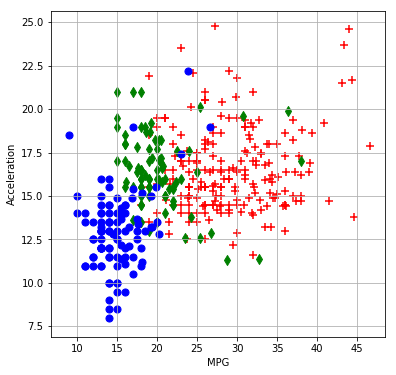

In [13]:
colors=["red","green","blue"]
markers=["+","d","o"]
nclasses=3
for i in range(nclasses):
    x,y=zip(*X[Y==i])
    plt.scatter(x,y,marker=markers[i],color=colors[i],s=50)
    
plt.xlabel("MPG")
plt.ylabel("Acceleration")
plt.grid()
plt.gcf().set_size_inches(6,6)

## Naive bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
gnb = GaussianNB()
errs=[]
nsplits=1000
for split in range(nsplits):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y)
    gnb.fit(xtrain, ytrain)
    YP=gnb.predict(xtest)
    errs.append(1-accuracy_score(ytest, YP))
print(np.mean(errs), np.std(errs))


0.14032653061224487 0.0306878250654389


Text(0, 0.5, 'Frequency (count)')

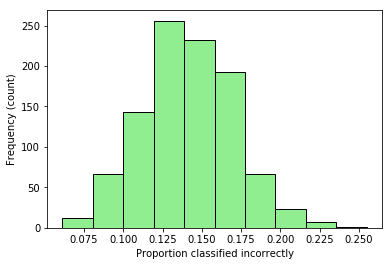

In [16]:
plt.hist(errs, edgecolor="black",color="lightgreen");
plt.xlabel("Proportion classified incorrectly")
plt.ylabel("Frequency (count)")

In [17]:
confusion_matrix(YP, ytest) # final run

array([[41,  4,  0],
       [ 9, 16,  1],
       [ 1,  5, 21]])

In [18]:
accuracy_score(YP, ytest) # final run

0.7959183673469388

In [19]:
def visualize_clasifier_contours(clf,X,Y,DX,DY,thelevels,colors,\
                                 markers,xlab="X",ylab="Y"):
    xinterval = X[:, 0].min() - 1, X[:, 0].max() + 1
    yinterval = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(*xinterval, DX),
                         np.arange(*yinterval, DY))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    c=plt.contour(xx, yy, Z, alpha=1,levels=thelevels,linewidths=2,colors="k")
    c=plt.contourf(xx, yy, Z, alpha=.1)

    nclasses=len(colors)
    for i in range(nclasses):
        x,y=zip(*X[Y==i])
        plt.scatter(x,y,marker=markers[i],color=colors[i],s=100)


    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.grid()
    fig=plt.gcf()
    fig.tight_layout()
    fig.set_size_inches(6,6)
 

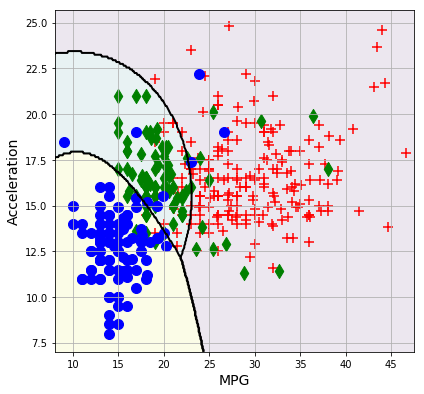

In [20]:
visualize_clasifier_contours(gnb, X, Y, .1, .1, [0.5, 1.5], 
                              colors, markers, "MPG", "Acceleration")

Does adding more featues make it better?

In [21]:
data.columns

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'origin'], dtype='object')

In [22]:
X=np.array(data[["mpg","displ","hp","weight","accel"]])
X[:3]

array([[  18. ,  307. ,  130. , 3504. ,   12. ],
       [  15. ,  350. ,  165. , 3693. ,   11.5],
       [  18. ,  318. ,  150. , 3436. ,   11. ]])

In [23]:
gnb = GaussianNB()
errs=[]
nsplits=1000
for split in range(nsplits):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y)
    gnb.fit(xtrain, ytrain)
    YP=gnb.predict(xtest)
    errs.append(1-accuracy_score(ytest, YP))
print(np.mean(errs), np.std(errs))


0.04405102040816327 0.018436691659123938


In [24]:
np.array(data["origin"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 3,
       3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 2, 1, 2,
       2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1,
       1, 1, 1, 2, 3, 3, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 2, 3, 2, 3,
       2, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 1, 1, 3, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 1,

In [25]:
DF=pd.get_dummies(data,columns=["origin"])
X=np.array(DF.drop(columns=["cyl"]))
X[:5]

array([[1.800e+01, 3.070e+02, 1.300e+02, 3.504e+03, 1.200e+01, 1.000e+00,
        0.000e+00, 0.000e+00],
       [1.500e+01, 3.500e+02, 1.650e+02, 3.693e+03, 1.150e+01, 1.000e+00,
        0.000e+00, 0.000e+00],
       [1.800e+01, 3.180e+02, 1.500e+02, 3.436e+03, 1.100e+01, 1.000e+00,
        0.000e+00, 0.000e+00],
       [1.600e+01, 3.040e+02, 1.500e+02, 3.433e+03, 1.200e+01, 1.000e+00,
        0.000e+00, 0.000e+00],
       [1.700e+01, 3.020e+02, 1.400e+02, 3.449e+03, 1.050e+01, 1.000e+00,
        0.000e+00, 0.000e+00]])

In [26]:
gnb = GaussianNB()
errs=[]
nsplits=1000
for split in range(nsplits):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y)
    gnb.fit(xtrain, ytrain)
    YP=gnb.predict(xtest)
    errs.append(1-accuracy_score(ytest, YP))
print(np.mean(errs), np.std(errs))

0.09831632653061223 0.02707790102399108


Text(0, 0.5, 'Frequency (count)')

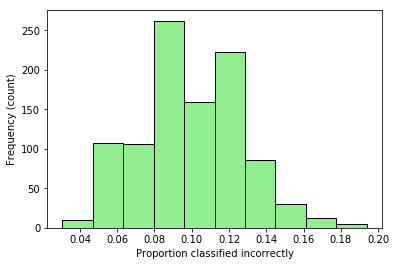

In [27]:
plt.hist(errs, edgecolor="black",color="lightgreen");
plt.xlabel("Proportion classified incorrectly")
plt.ylabel("Frequency (count)")

Origin doesn't really help this data

In [28]:
X=np.array(data[["mpg","accel"]])
X[:5]

array([[18. , 12. ],
       [15. , 11.5],
       [18. , 11. ],
       [16. , 12. ],
       [17. , 10.5]])

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
KNN = KNeighborsClassifier(n_neighbors=5) # default = 5 neighbors
errs=[]
nsplits=1000
for split in range(nsplits):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y)
    KNN.fit(xtrain, ytrain)
    YP=KNN.predict(xtest)
    errs.append(1-accuracy_score(ytest, YP))
print(np.mean(errs), np.std(errs))

0.1330816326530612 0.02976066547468391


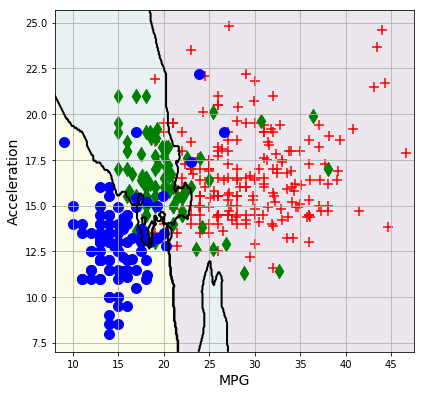

In [31]:
visualize_clasifier_contours(KNN, X, Y, .1, .1, [0.5, 1.5], 
                              colors, markers, "MPG", "Acceleration")

## QDA

In [32]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [33]:
model=QDA()
errs=[]
nsplits=1000
for split in range(nsplits):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y)
    model.fit(xtrain, ytrain)
    YP=model.predict(xtest)
    errs.append(1-accuracy_score(ytest, YP))
print(np.mean(errs), np.std(errs))

0.14625510204081632 0.03142477945584338


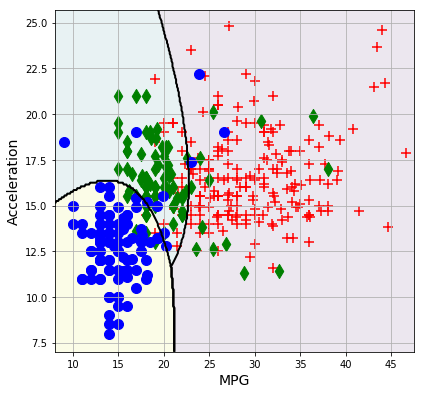

In [34]:
visualize_clasifier_contours(model, X, Y, .1, .1, [0.5, 1.5], 
                              colors, markers, "MPG", "Acceleration")